In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression

In [48]:
players = pd.read_csv('data_files//players_2014.csv')
players[['Player','temp']] = players['Player'].str.split('\\',expand=True)
players = players.drop(['Rk','temp'],axis=1)
players_grouped = players.groupby('Player').count()
players_grouped = players_grouped[players_grouped['Tm'] > 1]
players = players[~((players['Player'].isin(players_grouped.index)==True) & (players['Tm'] != 'TOT'))]

players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Quincy Acy,PF,24,NYK,68,22,18.9,2.2,4.9,0.459,0.3,0.9,0.300,2.0,4.0,0.494,0.486,1.1,1.4,0.784,1.2,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9
1,Jordan Adams,SG,20,MEM,30,0,8.3,1.2,2.9,0.407,0.3,0.8,0.400,0.8,2.0,0.410,0.465,0.5,0.8,0.609,0.3,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1
2,Steven Adams,C,21,OKC,70,67,25.3,3.1,5.7,0.544,0.0,0.0,0.000,3.1,5.7,0.547,0.544,1.5,2.9,0.502,2.8,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7
3,Jeff Adrien,PF,28,MIN,17,0,12.6,1.1,2.6,0.432,0.0,0.0,NaN,1.1,2.6,0.432,0.432,1.3,2.2,0.579,1.4,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5
4,Arron Afflalo,SG,29,TOT,78,72,32.1,4.8,11.3,0.424,1.5,4.3,0.354,3.3,7.1,0.466,0.491,2.1,2.5,0.843,0.3,2.8,3.2,1.7,0.5,0.1,1.5,2.1,13.3


In [49]:
hw = pd.read_excel('data_files//heightweight.xlsx',sheet_name='2014')
new_names = ['Player','Height','x','Weight']
hw.columns = new_names
hw = hw.drop('x',axis=1)

players_merged = players.merge(right=hw,
                               left_on=['Player'],
                               right_on=['Player'],
                               how='inner')

players_merged = players_merged.set_index('Player')

([<matplotlib.axis.XTick at 0x180036d12c8>,
 <a list of 18 Text xticklabel objects>)

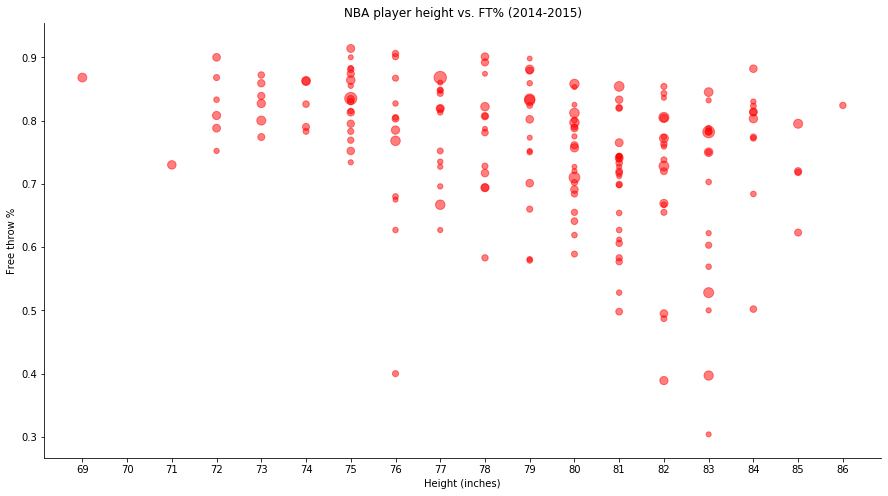

In [50]:
ft = players_merged[players_merged['FTA'] > 1.5]

fig, ax = plt.subplots(figsize=[15,8])

# Size of bubble indicates number of free throws attempted per game
ax.scatter(ft['Height'], ft['FT%'], s=ft['FTA']*15, c='red', alpha=0.5)
ax.set_title('NBA player height vs. FT% (2014-2015)')
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Free throw %')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(69.0,87.0, step=1.0))

In [51]:
players_corr = players_merged.drop(['Tm','FG','FGA','3P','3PA','2P','2PA'],axis=1)

pd.set_option('display.max_columns', None)

display(players_corr.corr(method='pearson'))

,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Height,Weight
Age,1.000000,0.035629,-0.095318,-0.094879,-0.011479,0.015418,-0.009565,0.024698,-0.118577,-0.146815,0.052679,-0.115464,-0.072365,-0.092020,-0.047865,-0.160478,-0.106326,-0.127848,-0.109473,-0.102766,-0.001771,0.057866
G,0.035629,1.000000,0.571245,0.601553,0.338030,0.048900,0.377353,0.352002,0.327679,0.332436,0.160285,0.318038,0.478306,0.448497,0.276658,0.384081,0.265687,0.345708,0.494648,0.462908,0.038314,0.071198
GS,-0.095318,0.571245,1.000000,0.827188,0.242596,0.110109,0.228553,0.232924,0.589722,0.598896,0.160921,0.386998,0.677106,0.613311,0.489301,0.580114,0.379035,0.614844,0.582795,0.733405,0.052445,0.048799
MP,-0.094879,0.601553,0.827188,1.000000,0.207242,0.180246,0.230688,0.226299,0.732188,0.738217,0.240563,0.355587,0.693164,0.613773,0.633713,0.736931,0.325637,0.769702,0.654328,0.886070,-0.092479,-0.083980
FG%,-0.011479,0.338030,0.242596,0.207242,1.000000,0.051713,0.905960,0.865641,0.171670,0.231087,-0.164434,0.527182,0.428647,0.487073,-0.052696,0.047530,0.483050,0.117161,0.317519,0.206929,0.383353,0.387331
3P%,0.015418,0.048900,0.110109,0.180246,0.051713,1.000000,0.017854,0.388026,0.101879,0.040529,0.355129,-0.326587,-0.091613,-0.177127,0.142158,0.131736,-0.240705,0.097007,-0.068768,0.212006,-0.199764,-0.281467
2P%,-0.009565,0.377353,0.228553,0.230688,0.905960,0.017854,1.000000,0.832634,0.145653,0.193361,-0.101735,0.408866,0.369343,0.404574,-0.005543,0.130170,0.384633,0.113139,0.288913,0.211445,0.267896,0.276966
eFG%,0.024698,0.352002,0.232924,0.226299,0.865641,0.388026,0.832634,1.000000,0.106237,0.129380,-0.006795,0.262568,0.275774,0.287600,-0.017278,0.090814,0.289839,0.084025,0.239006,0.219010,0.203908,0.171269
FT,-0.118577,0.327679,0.589722,0.732188,0.171670,0.101879,0.145653,0.106237,1.000000,0.977984,0.299248,0.297526,0.568017,0.505725,0.594529,0.603096,0.267824,0.782020,0.429424,0.896317,-0.059835,-0.035841
FTA,-0.146815,0.332436,0.598896,0.738217,0.231087,0.040529,0.193361,0.129380,0.977984,1.000000,0.163310,0.406736,0.640422,0.595224,0.560029,0.599373,0.347241,0.786952,0.487268,0.876985,-0.003148,0.028241


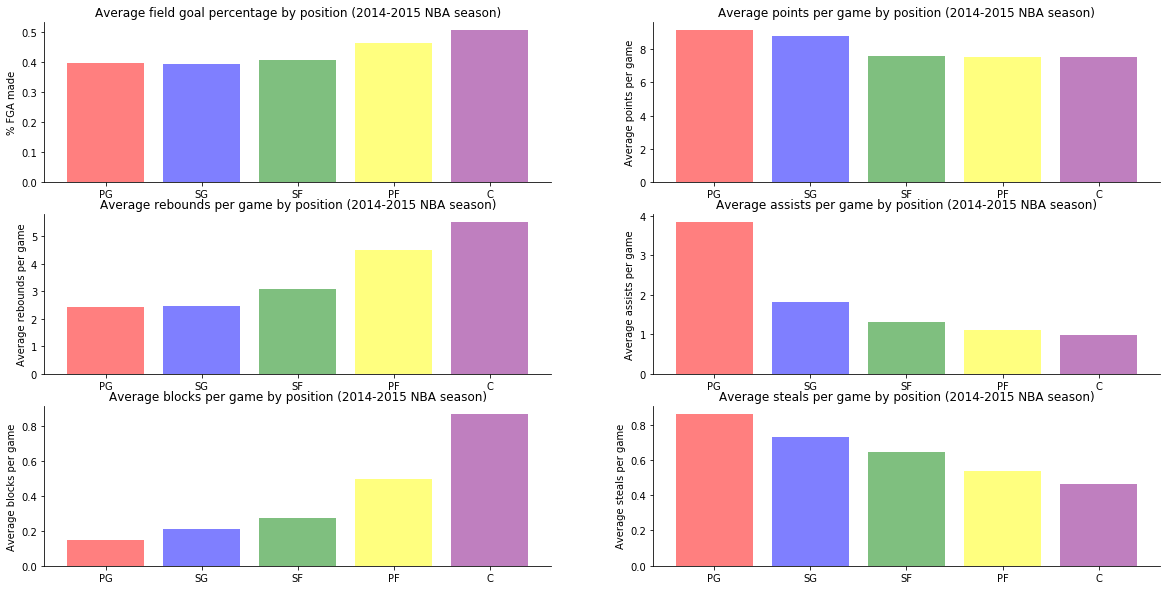

In [52]:
players_pos = players.groupby('Pos').mean()
to_keep = ['PG', 'SG', 'SF', 'PF', 'C']
players_pos = players_pos[players_pos.index.isin(to_keep)]
players_pos = players_pos.reindex(index = ['PG', 'SG', 'SF', 'PF', 'C'])

colors = ['red','blue','green','yellow','purple']

fig, ax = plt.subplots(3,2, figsize=[20,10])

ax[0,0].bar(players_pos.index, players_pos['FG%'], color=colors, alpha=0.5)
ax[0,0].set_title('Average field goal percentage by position (2014-2015 NBA season)')
ax[0,0].set_ylabel('% FGA made')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)

ax[0,1].bar(players_pos.index, players_pos['PTS'], color=colors, alpha=0.5)
ax[0,1].set_title('Average points per game by position (2014-2015 NBA season)')
ax[0,1].set_ylabel('Average points per game')
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)

ax[1,0].bar(players_pos.index, players_pos['TRB'], color=colors, alpha=0.5)
ax[1,0].set_title('Average rebounds per game by position (2014-2015 NBA season)')
ax[1,0].set_ylabel('Average rebounds per game')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].bar(players_pos.index, players_pos['AST'], color=colors, alpha=0.5)
ax[1,1].set_title('Average assists per game by position (2014-2015 NBA season)')
ax[1,1].set_ylabel('Average assists per game')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)

ax[2,0].bar(players_pos.index, players_pos['BLK'], color=colors, alpha=0.5)
ax[2,0].set_title('Average blocks per game by position (2014-2015 NBA season)')
ax[2,0].set_ylabel('Average blocks per game')
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)

ax[2,1].bar(players_pos.index, players_pos['STL'], color=colors, alpha=0.5)
ax[2,1].set_title('Average steals per game by position (2014-2015 NBA season)')
ax[2,1].set_ylabel('Average steals per game')
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)

I'm interested in seeing how these trends have changed over time. Basketball has gotten smaller over the last few decades with a greater emphasis on shooting than inside scoring. It would make sense to me that if we go a few decades back, you would expect point guards and shooting guards to have a less significant share of scoring than they do in the 2014-2015 data.

In [67]:
players_1994 = pd.read_csv('data_files//players_1994.csv')
players_1994[['Player','temp']] = players_1994['Player'].str.split('\\', expand=True)
players_1994 = players_1994.drop(['temp','Rk'], axis=1)
players_1994_grouped = players_1994.groupby('Player').count()
players_1994_grouped = players_1994_grouped[players_1994_grouped['Tm'] > 1]
players_1994 = players_1994[~((players_1994['Player'].isin(players_1994_grouped.index)==True) & (players_1994['Tm'] != 'TOT'))]


Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object